# **MNIST Digits prediction with feed forward Neural Networks and CNNs**

import libraries and data

In [ ]:
from keras.datasets import mnist
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt




Let's visualize what the data looks like


11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


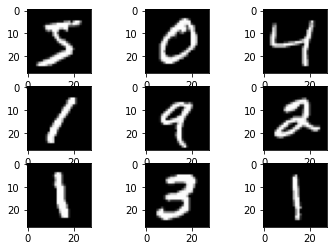

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
 
# show the figure
pyplot.show()

Let's ensure that the data is evenly distributed per class (if not, we would have to make corrections). We should expect that each class represents roughly 10% of the entire dataset.


In [ ]:

for i in range(10):
  count_train = np.where(trainy == i)[0]
  count_test = np.where(testy == i)[0]

  print("Label %d - train: %.4f - test: %.4f" %(i, count_train.shape[0] / float(trainy.shape[0]), count_test.shape[0] / float(testy.shape[0]) ))

Label 0 - train: 0.0987 - test: 0.0980
Label 1 - train: 0.1124 - test: 0.1135
Label 2 - train: 0.0993 - test: 0.1032
Label 3 - train: 0.1022 - test: 0.1010
Label 4 - train: 0.0974 - test: 0.0982
Label 5 - train: 0.0903 - test: 0.0892
Label 6 - train: 0.0986 - test: 0.0958
Label 7 - train: 0.1044 - test: 0.1028
Label 8 - train: 0.0975 - test: 0.0974
Label 9 - train: 0.0992 - test: 0.1009


Ok, it looks good....we can work with these classes as is. Now let's start doing some prediction. We should split the training data into train and dev sets.
 

In [ ]:
#Enter code here 

Now let's try building a 2-layer feed forward network to predict digits. Remember, each data point is a 28x28 image, so you will need to flatten it into a vector for a feed forward DNN.

In [ ]:
#Train DNN and predict on test

#Example
net = FeedForwardNet(dim_input=(trainX.shape[1]*trainX.shape[2]), dim_out=10)

torch_trainX = torch.from_numpy(trainX).float()
torch_trainy = torch.from_numpy(trainy).long()
torch_testX = torch.from_numpy(testX).float()
torch_testy = torch.from_numpy(testy).long()

net.train(torch_trainX, torch_trainy, epochs=4000, batch_size=64)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Iteration 0 - loss: 2.4436
Iteration 100 - loss: 2.0830
Iteration 200 - loss: 1.9942
Iteration 300 - loss: 1.9224
Iteration 400 - loss: 1.8462
Iteration 500 - loss: 1.7778
Iteration 600 - loss: 1.7100
Iteration 700 - loss: 1.6510
Iteration 800 - loss: 1.5951
Iteration 900 - loss: 1.5447
Iteration 1000 - loss: 1.4962
Iteration 1100 - loss: 1.4507
Iteration 1200 - loss: 1.4026
Iteration 1300 - loss: 1.3614
Iteration 1400 - loss: 1.3110
Iteration 1500 - loss: 1.2733
Iteration 1600 - loss: 1.2350
Iteration 1700 - loss: 1.1968
Iteration 1800 - loss: 1.1638
Iteration 1900 - loss: 1.1314
Iteration 2000 - loss: 1.1017
Iteration 2100 - loss: 1.0698
Iteration 2200 - loss: 1.0420
Iteration 2300 - loss: 1.0152
Iteration 2400 - loss: 0.9845
Iteration 2500 - loss: 0.9601
Iteration 2600 - loss: 0.9356
Iteration 2700 - loss: 0.9129
Iteration 2800 - loss: 0.8877
Iteration 2900 - loss: 0.8673
Iteration 3000 - loss: 0.8477
Iteration 3100 - loss: 0.8290
Iteration 3200 - loss: 0.8108
Iteration 3300 - loss:

In [ ]:
#Define DNN class here

#Example Solution


class FeedForwardNet(nn.Module):

    def __init__(self, dim_input, dim_out):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(dim_input, 32)
        self.fc2 = nn.Linear(32, dim_out)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

    def train(self, X, y, epochs, batch_size):
        optimizer = optim.SGD(net.parameters(), lr=0.001)
        indices = np.arange(X.shape[0])

        criterion = nn.CrossEntropyLoss()
        for i in range(epochs):
            optimizer.zero_grad()

            idx = indices[:batch_size]
            batch_data = X[idx].reshape((batch_size, -1))
            batch_label = y[idx]

            logits = self.forward(batch_data)

            loss = criterion(logits, batch_label)
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
              print("Iteration %d - loss: %.4f" %(i, loss))



    def test(self, test_data, test_labels, batch_size):
        k = 0
        all_probs = None
        while k < test_data.shape[0]:
            batch = test_data[k:k+batch_size,:,:] if k + batch_size <= test_data.shape[0] else test_data[k:,:,:]
            batch = batch.reshape((-1,test_data.shape[1]*test_data.shape[2]))
            logits = self.forward(batch)

            probs = F.softmax(logits).detach().numpy()

            all_probs = probs if all_probs is None else np.vstack((all_probs, probs))
            k += batch_size

        return all_probs




In [ ]:
pred_probs = net.test(torch_testX, torch_testy, batch_size=64)
preds = np.argmax(pred_probs, axis=1)
p, r, f, _ = precision_recall_fscore_support(testy, preds)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Report: 
- precision
- recall
- ROC curve
- confusion matrix

In [ ]:
#Enter code here
for i in range(p.shape[0]):
  print("Label: %d - Precision: %.4f - Recall: %.4f - f1: %.4f"  %(i, p[i], r[i], f[i]))

Label: 0 - Precision: 0.5874 - Recall: 0.6755 - f1: 0.6284
Label: 1 - Precision: 0.6167 - Recall: 0.7656 - f1: 0.6832
Label: 2 - Precision: 0.4114 - Recall: 0.2316 - f1: 0.2963
Label: 3 - Precision: 0.3893 - Recall: 0.4337 - f1: 0.4103
Label: 4 - Precision: 0.2761 - Recall: 0.4817 - f1: 0.3510
Label: 5 - Precision: 0.3587 - Recall: 0.0740 - f1: 0.1227
Label: 6 - Precision: 0.3796 - Recall: 0.5971 - f1: 0.4641
Label: 7 - Precision: 0.5806 - Recall: 0.2451 - f1: 0.3447
Label: 8 - Precision: 0.2624 - Recall: 0.0595 - f1: 0.0971
Label: 9 - Precision: 0.2808 - Recall: 0.4727 - f1: 0.3523


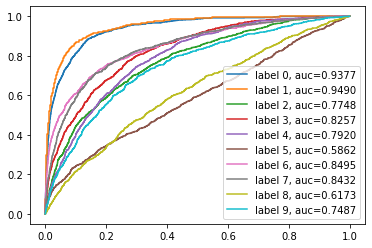

In [ ]:
y = label_binarize(testy, classes=np.unique(testy))
plt.clf()
for i in range(10):
  fpr, tpr, _ = metrics.roc_curve(y[:,i],  pred_probs[:,i])
  auc = metrics.roc_auc_score(y[:,i], pred_probs[:,i])
  plt.plot(fpr,tpr,label="label %d, auc=%.4f" %(i, auc))
plt.legend(loc=4)
plt.show()

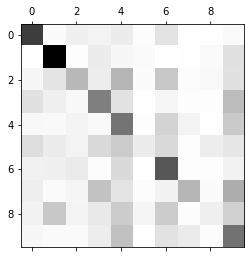

In [ ]:
cm=metrics.confusion_matrix(testy,preds)
plt.matshow(cm, cmap='binary')

Now let's build a CNN network for image recognition.

In [ ]:
# Define CNN

#Example solution
class CNN_network(nn.Module):
  
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def train(self, X, y, epochs, batch_size):
        optimizer = optim.SGD(net.parameters(), lr=0.001)
        indices = np.arange(X.shape[0])

        criterion = nn.CrossEntropyLoss()
        for i in range(epochs):
            optimizer.zero_grad()

            idx = indices[:batch_size]
            batch_data = X[idx]
            batch_label = y[idx]

            logits = self.forward(batch_data)

            loss = criterion(logits, batch_label)
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
              print("Iteration %d - loss: %.4f" %(i, loss))

    def test(self, test_data, test_labels, batch_size):
        k = 0
        all_probs = None
        while k < test_data.shape[0]:
            batch = test_data[k:k+batch_size,:,:] if k + batch_size <= test_data.shape[0] else test_data[k:,:,:]
            logits = self.forward(batch)

            probs = F.softmax(logits).detach().numpy()

            all_probs = probs if all_probs is None else np.vstack((all_probs, probs))
            k += batch_size

        return all_probs
        



In [ ]:
# Train CNN and predict on test
net = CNN_network()

torch_trainX = torch.from_numpy(trainX).float()
torch_trainy = torch.from_numpy(trainy).long()
torch_testX = torch.from_numpy(testX).float()
torch_testy = torch.from_numpy(testy).long()

torch_trainX = torch.unsqueeze(torch_trainX, 1)
torch_testX = torch.unsqueeze(torch_testX, 1)

net.train(torch_trainX, torch_trainy, epochs=1000, batch_size=128)


Iteration 0 - loss: 4.6212
Iteration 100 - loss: 0.1222
Iteration 200 - loss: 0.0353
Iteration 300 - loss: 0.0183
Iteration 400 - loss: 0.0118
Iteration 500 - loss: 0.0085
Iteration 600 - loss: 0.0066
Iteration 700 - loss: 0.0054
Iteration 800 - loss: 0.0045
Iteration 900 - loss: 0.0038


In [ ]:
pred_probs = net.test(torch_testX, torch_testy, batch_size=64)
preds = np.argmax(pred_probs, axis=1)
p, r, f, _ = precision_recall_fscore_support(testy, preds)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Report: 
- precision
- recall
- ROC curve
- confusion matrix

In [ ]:
#Enter code here
for i in range(p.shape[0]):
  print("Label: %d - Precision: %.4f - Recall: %.4f - f1: %.4f"  %(i, p[i], r[i], f[i]))

Label: 0 - Precision: 0.7035 - Recall: 0.9153 - f1: 0.7956
Label: 1 - Precision: 0.8205 - Recall: 0.9824 - f1: 0.8941
Label: 2 - Precision: 0.7525 - Recall: 0.8101 - f1: 0.7802
Label: 3 - Precision: 0.7254 - Recall: 0.7455 - f1: 0.7354
Label: 4 - Precision: 0.6613 - Recall: 0.7495 - f1: 0.7026
Label: 5 - Precision: 0.6341 - Recall: 0.2253 - f1: 0.3325
Label: 6 - Precision: 0.8118 - Recall: 0.6482 - f1: 0.7208
Label: 7 - Precision: 0.7576 - Recall: 0.7539 - f1: 0.7557
Label: 8 - Precision: 0.7804 - Recall: 0.4415 - f1: 0.5639
Label: 9 - Precision: 0.5463 - Recall: 0.7839 - f1: 0.6439


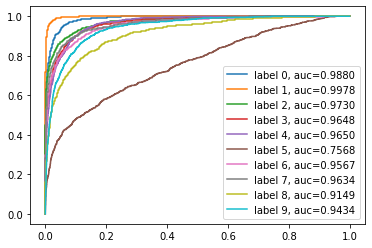

In [ ]:
y = label_binarize(testy, classes=np.unique(testy))
plt.clf()
for i in range(10):
  fpr, tpr, _ = metrics.roc_curve(y[:,i],  pred_probs[:,i])
  auc = metrics.roc_auc_score(y[:,i], pred_probs[:,i])
  plt.plot(fpr,tpr,label="label %d, auc=%.4f" %(i, auc))
plt.legend(loc=4)
plt.show()

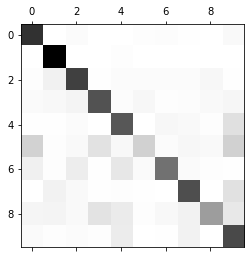

In [ ]:
cm=metrics.confusion_matrix(testy,preds)
plt.matshow(cm, cmap='binary')

At this point, you should have seen an improvement in performance when using CNN for images over DNN. Look into the performance metrics (specially the confusion matrix), and try to identify where CNNs made a difference in performance.

Are there specific number pairs that were difficult for DNN but improved on CNN?

Finally, pick a pair of classes that have high confusion an plot examples that are confusing between them. Can you see why the confusion happens? (This type of post-hoc investigation is typical in the industry to understand why/when something might fail, and work towards fixing those edge cases).

 

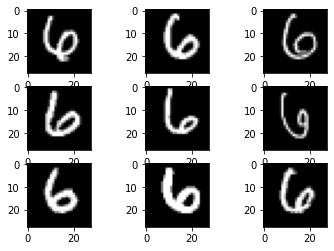

In [ ]:
#Enter code here

#From the confusion matrix we can see what numbers tend to be confused with others.
#Find some pair of numbers that create confusion and visualize why they might be having issues.

examples = []
for i in range(preds.shape[0]):
  if (preds[i] == 4 and testy[i] == 6):
    examples.append( testX[i] )

    if len(examples) == 9:
      break

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(examples[i], cmap=pyplot.get_cmap('gray'))
 
# show the figure
pyplot.show()
